In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import random

import numpy as np
from tifffile import TiffFile
import matplotlib.pyplot as plt
from tqdm import tqdm

from framework.dataset import LandCoverData as LCD
import pandas as pd


from sklearn.model_selection import train_test_split
import skimage
from skimage import io

In [2]:
pwd

'/home/jacquin/Documents/DATA_SCIENCE/COMPETITION/PRELIGENS'

In [3]:
df1 = pd.read_csv("train_images_Es8kvkp.csv")

In [4]:
df1.head(100)

,sample_id
0,1
1,2
2,3
3,4
4,5
...,...
95,96
96,97
97,98
98,99


In [5]:
df1.describe()

,sample_id
count,18491.000000
mean,11232.636364
std,7424.213297
min,1.000000
25%,4623.500000
50%,9246.000000
75%,18911.500000
max,23534.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18491 entries, 0 to 18490
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sample_id  18491 non-null  int64
dtypes: int64(1)
memory usage: 144.6 KB


In [7]:
df2 = pd.read_csv("train_labels_GY1QjFw.csv")

In [8]:
df2.head()

,sample_id,no_data,clouds,artificial,cultivated,broadleaf,coniferous,herbaceous,natural,snow,water
0,1,0.0,0.0,0.032867,0.743835,0.054214,0.000565,0.168518,0.0,0.0,0.000000
1,2,0.0,0.0,0.094040,0.759445,0.025238,0.000320,0.120544,0.0,0.0,0.000412
2,3,0.0,0.0,0.043762,0.575974,0.061676,0.001053,0.317535,0.0,0.0,0.000000
3,4,0.0,0.0,0.007538,0.116974,0.448486,0.042938,0.382553,0.0,0.0,0.001511
4,5,0.0,0.0,0.022217,0.279907,0.414169,0.013840,0.268982,0.0,0.0,0.000885


In [9]:
df2.describe()

,sample_id,no_data,clouds,artificial,cultivated,broadleaf,coniferous,herbaceous,natural,snow,water
count,18491.000000,18491.0,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000,1.849100e+04,18491.000000
mean,11232.636364,0.0,0.000017,0.050313,0.334009,0.228591,0.079610,0.275128,0.008067,8.837901e-07,0.024265
std,7424.213297,0.0,0.000173,0.092671,0.251843,0.197045,0.122302,0.181768,0.047178,4.266228e-05,0.118104
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,4623.500000,0.0,0.000000,0.004433,0.111000,0.062141,0.005997,0.141190,0.000000,0.000000e+00,0.000000
50%,9246.000000,0.0,0.000000,0.015793,0.295502,0.176300,0.026169,0.241089,0.000000,0.000000e+00,0.000153
75%,18911.500000,0.0,0.000000,0.051956,0.527870,0.355652,0.099792,0.371140,0.000259,0.000000e+00,0.002853
max,23534.000000,0.0,0.006073,0.874939,0.992493,0.988602,0.996765,0.999695,0.868439,4.852295e-03,1.000000


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18491 entries, 0 to 18490
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sample_id   18491 non-null  int64  
 1   no_data     18491 non-null  float64
 2   clouds      18491 non-null  float64
 3   artificial  18491 non-null  float64
 4   cultivated  18491 non-null  float64
 5   broadleaf   18491 non-null  float64
 6   coniferous  18491 non-null  float64
 7   herbaceous  18491 non-null  float64
 8   natural     18491 non-null  float64
 9   snow        18491 non-null  float64
 10  water       18491 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


In [16]:
DATA_FOLDER_STR = '/media/jacquin/STOCKAGE/DATA_PRELIGENS/'
DATA_FOLDER = Path(DATA_FOLDER_STR).expanduser()
# path to the unzipped dataset: contains directories train/ and test/


# get all train images and masks
train_images_paths = sorted(list(DATA_FOLDER.glob('DATASET/TRAIN/IMAGES/*.tif')))
train_masks_paths = sorted(list(DATA_FOLDER.glob('DATASET/TRAIN/MASKS/*.tif')))
# get all test images
test_images_paths = sorted(list(DATA_FOLDER.glob('DATASET/TEST/IMAGES/*.tif')))

In [17]:
train_images_paths

[PosixPath('/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/1.tif'),
 PosixPath('/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/10.tif'),
 PosixPath('/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/100.tif'),
 PosixPath('/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/1000.tif'),
 PosixPath('/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/10000.tif'),
 PosixPath('/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/10001.tif'),
 PosixPath('/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/10002.tif'),
 PosixPath('/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/10003.tif'),
 PosixPath('/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/10004.tif'),
 PosixPath('/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/10005.tif'),
 PosixPath('/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/10006.tif'),
 PosixPath('/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/100

In [18]:
import os

In [19]:
train_images = os.listdir("/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/")
train_masks = os.listdir("/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/MASKS")

In [20]:
train = pd.DataFrame(train_images)

In [21]:
train["Images"] = pd.DataFrame(train_images)

In [22]:
train["Masks"] = pd.DataFrame(train_masks)

In [23]:
train.head(100)

,0,Images,Masks
0,1.tif,1.tif,1.tif
1,10.tif,10.tif,10.tif
2,100.tif,100.tif,100.tif
3,1000.tif,1000.tif,1000.tif
4,10000.tif,10000.tif,10000.tif
...,...,...,...
95,6507.tif,6507.tif,6507.tif
96,6508.tif,6508.tif,6508.tif
97,6509.tif,6509.tif,6509.tif
98,651.tif,651.tif,651.tif


In [24]:
train.sort_values(by=["Images"],ascending=True)

,0,Images,Masks
0,1.tif,1.tif,1.tif
1,10.tif,10.tif,10.tif
2,100.tif,100.tif,100.tif
3,1000.tif,1000.tif,1000.tif
4,10000.tif,10000.tif,10000.tif
...,...,...,...
10024,9995.tif,9995.tif,9995.tif
10025,9996.tif,9996.tif,9996.tif
10026,9997.tif,9997.tif,9997.tif
10027,9998.tif,9998.tif,9998.tif


In [25]:
data = train["Images"]

In [26]:
target = train["Masks"]

train_dataset = tf.data.Dataset.from_tensor_slices(list(map(str, train_files)))\

In [27]:
# Split of the training and test data
X_train_path, X_test_path, y_train_path, y_test_path = train_test_split(data, target, train_size=0.8, random_state=456)

In [28]:
X_train_path

12812    13613.tif
9783       150.tif
15648    22992.tif
17962    14190.tif
10394    13568.tif
           ...    
12532     8708.tif
12111     6737.tif
10735    18521.tif
16043     2762.tif
613       7017.tif
Name: Images, Length: 14792, dtype: object

In [29]:
X_train_path.shape

(14792,)

In [30]:
X_test_path.shape

(3699,)

In [31]:
y_train_path.shape

(14792,)

In [32]:
y_train_path

12812    13613.tif
9783       150.tif
15648    22992.tif
17962    14190.tif
10394    13568.tif
           ...    
12532     8708.tif
12111     6737.tif
10735    18521.tif
16043     2762.tif
613       7017.tif
Name: Masks, Length: 14792, dtype: object

In [33]:
y_train_path.shape

(14792,)

In [35]:
y_test_path.shape

(3699,)

In [37]:
import tensorflow as tf

In [38]:
from os import chdir as cd
cd ("/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TRAIN/IMAGES/")

X_train = []
for file in tqdm(X_train_path):
    # Read the file
    im = skimage.io.imread(file)
    X_train.append([im])
X_train = tf.concat(X_train, axis=0)

X_train = tf.concat(X_train, axis=0)

y_train = []
for file in tqdm(y_train_path):
    # Read the file
    im = skimage.io.imread(file)
    y_train.append([im])
y_train = tf.concat(y_train, axis=0)

y_train = tf.concat(y_train, axis=0)

In [50]:
@tf.function
def load_image(filepath):
# read file
    im = skimage.io.imread(filepath)
   # im = tf.image.convert_image_dtype(im, tf.float32)
    #im = tf.image.decode_image(im)
    #im = tf.image.convert_image_dtype(im, tf.float32)
    #im = img_as_float(im)
    return im

In [46]:
im = skimage.io.imread(liste_images_train[0])

In [47]:
im.dtype

dtype('uint16')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


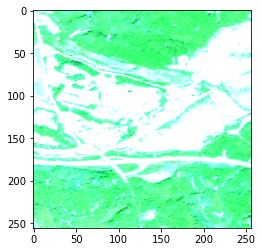

In [48]:
plt.imshow(im)

In [51]:
img = tf.image.convert_image_dtype(im, tf.float32) 

In [52]:
img.dtype

tf.float32

In [53]:
img

<tf.Tensor: shape=(256, 256, 4), dtype=float32, numpy=
array([[[0.00985733, 0.01298543, 0.01400778, 0.03514153],
        [0.00537118, 0.00973526, 0.00796521, 0.05191119],
        [0.00537118, 0.00973526, 0.00796521, 0.05191119],
        ...,
        [0.00105287, 0.0047303 , 0.0018616 , 0.06083772],
        [0.00032044, 0.00350958, 0.00143435, 0.04998856],
        [0.00073243, 0.00363165, 0.00177005, 0.0464332 ]],

       [[0.01063554, 0.01431296, 0.01536584, 0.03103685],
        [0.00709544, 0.01040665, 0.00936904, 0.04307622],
        [0.00709544, 0.01040665, 0.00936904, 0.04307622],
        ...,
        [0.00123598, 0.00517281, 0.00216678, 0.05830472],
        [0.00102235, 0.00415045, 0.00187686, 0.05218586],
        [0.00172427, 0.00471504, 0.00218204, 0.05017167]],

       [[0.01313802, 0.01699855, 0.01736477, 0.02896162],
        [0.01048295, 0.01416037, 0.01606775, 0.0381323 ],
        [0.01048295, 0.01416037, 0.01606775, 0.0381323 ],
        ...,
        [0.00109865, 0.004654  ,

In [54]:
load_image(liste_images_train[0])

<tf.Tensor: shape=(256, 256, 4), dtype=uint16, numpy=
array([[[ 646,  851,  918, 2303],
        [ 352,  638,  522, 3402],
        [ 352,  638,  522, 3402],
        ...,
        [  69,  310,  122, 3987],
        [  21,  230,   94, 3276],
        [  48,  238,  116, 3043]],

       [[ 697,  938, 1007, 2034],
        [ 465,  682,  614, 2823],
        [ 465,  682,  614, 2823],
        ...,
        [  81,  339,  142, 3821],
        [  67,  272,  123, 3420],
        [ 113,  309,  143, 3288]],

       [[ 861, 1114, 1138, 1898],
        [ 687,  928, 1053, 2499],
        [ 687,  928, 1053, 2499],
        ...,
        [  72,  305,  130, 3760],
        [  50,  299,  132, 3545],
        [  82,  293,  159, 3872]],

       ...,

       [[ 121,  378,  178, 3021],
        [ 142,  378,  222, 2820],
        [ 142,  378,  222, 2820],
        ...,
        [  82,  272,  121, 4365],
        [ 118,  372,  190, 4164],
        [ 113,  348,  210, 3879]],

       [[ 113,  330,  158, 2818],
        [ 121,  352,  1

In [55]:
tensor1 = tf.data.Dataset.from_tensor_slices(liste_images_train)

In [56]:
tensor1

<TensorSliceDataset shapes: (), types: tf.string>

In [57]:
tensor2 = tf.data.Dataset.from_tensor_slices(X_train_path)

In [58]:
tensor2

<TensorSliceDataset shapes: (), types: tf.string>

In [61]:
tensor3 = tf.data.Dataset.from_tensor_slices(y_train_path)

In [62]:
tensor3 

<TensorSliceDataset shapes: (), types: tf.string>

In [44]:
liste_images_train = list(map(str, X_train_path))
liste_masks_train = list(map(str, y_train_path))

In [45]:
liste_images_train

['13613.tif',
 '150.tif',
 '22992.tif',
 '14190.tif',
 '13568.tif',
 '3971.tif',
 '21526.tif',
 '22959.tif',
 '5495.tif',
 '7960.tif',
 '20630.tif',
 '7904.tif',
 '3547.tif',
 '2844.tif',
 '4241.tif',
 '16370.tif',
 '901.tif',
 '1273.tif',
 '8719.tif',
 '22126.tif',
 '9073.tif',
 '714.tif',
 '1243.tif',
 '3367.tif',
 '2076.tif',
 '8947.tif',
 '3738.tif',
 '1613.tif',
 '9081.tif',
 '888.tif',
 '2724.tif',
 '9606.tif',
 '9727.tif',
 '20677.tif',
 '18557.tif',
 '16711.tif',
 '4583.tif',
 '1782.tif',
 '4947.tif',
 '8337.tif',
 '19740.tif',
 '2115.tif',
 '2406.tif',
 '22175.tif',
 '20685.tif',
 '2608.tif',
 '8253.tif',
 '2704.tif',
 '7266.tif',
 '6137.tif',
 '15677.tif',
 '1221.tif',
 '3646.tif',
 '16132.tif',
 '7362.tif',
 '20538.tif',
 '21429.tif',
 '13759.tif',
 '8611.tif',
 '5137.tif',
 '19699.tif',
 '5697.tif',
 '20737.tif',
 '22005.tif',
 '9027.tif',
 '9792.tif',
 '8393.tif',
 '6448.tif',
 '14154.tif',
 '23081.tif',
 '23209.tif',
 '23370.tif',
 '23094.tif',
 '9940.tif',
 '6021.tif',
 

In [59]:
liste_masks_train

['13613.tif',
 '150.tif',
 '22992.tif',
 '14190.tif',
 '13568.tif',
 '3971.tif',
 '21526.tif',
 '22959.tif',
 '5495.tif',
 '7960.tif',
 '20630.tif',
 '7904.tif',
 '3547.tif',
 '2844.tif',
 '4241.tif',
 '16370.tif',
 '901.tif',
 '1273.tif',
 '8719.tif',
 '22126.tif',
 '9073.tif',
 '714.tif',
 '1243.tif',
 '3367.tif',
 '2076.tif',
 '8947.tif',
 '3738.tif',
 '1613.tif',
 '9081.tif',
 '888.tif',
 '2724.tif',
 '9606.tif',
 '9727.tif',
 '20677.tif',
 '18557.tif',
 '16711.tif',
 '4583.tif',
 '1782.tif',
 '4947.tif',
 '8337.tif',
 '19740.tif',
 '2115.tif',
 '2406.tif',
 '22175.tif',
 '20685.tif',
 '2608.tif',
 '8253.tif',
 '2704.tif',
 '7266.tif',
 '6137.tif',
 '15677.tif',
 '1221.tif',
 '3646.tif',
 '16132.tif',
 '7362.tif',
 '20538.tif',
 '21429.tif',
 '13759.tif',
 '8611.tif',
 '5137.tif',
 '19699.tif',
 '5697.tif',
 '20737.tif',
 '22005.tif',
 '9027.tif',
 '9792.tif',
 '8393.tif',
 '6448.tif',
 '14154.tif',
 '23081.tif',
 '23209.tif',
 '23370.tif',
 '23094.tif',
 '9940.tif',
 '6021.tif',
 

In [40]:
dataset_train = tf.data.Dataset.from_tensor_slices((X_train_path, y_train_path))

In [106]:
dataset_train

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [76]:
dataset_train2 = tf.data.Dataset.from_tensor_slices((liste_images_train, liste_masks_train))

In [77]:
dataset_train2

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [60]:
dataset_train = dataset_train.map(lambda x, y : [load_image(x), load_image(y)], num_parallel_calls=-1).batch(32)

StagingError: in user code:

    <ipython-input-60-9b259d146e50>:1 None  *
        lambda x, y : [load_image(x), load_image(y)]
    <ipython-input-50-2bbfa51210e5>:4 load_image  *
        im = skimage.io.imread(filepath)
    /home/jacquin/anaconda3/lib/python3.8/site-packages/skimage/io/_io.py:48 imread  *
        img = call_plugin('imread', fname, plugin=plugin, **plugin_args)
    /home/jacquin/anaconda3/lib/python3.8/site-packages/skimage/io/manage_plugins.py:209 call_plugin  *
        return func(*args, **kwargs)
    /home/jacquin/anaconda3/lib/python3.8/site-packages/skimage/io/_plugins/imageio_plugin.py:239 imread  *
        return np.asarray(imageio_imread(*args, **kwargs))
    /home/jacquin/anaconda3/lib/python3.8/site-packages/imageio/core/functions.py:265 imread  *
        reader = read(uri, format, "i", **kwargs)
    /home/jacquin/anaconda3/lib/python3.8/site-packages/imageio/core/functions.py:172 get_reader  *
        request = Request(uri, "r" + mode, **kwargs)
    /home/jacquin/anaconda3/lib/python3.8/site-packages/imageio/core/request.py:124 __init__  **
        self._parse_uri(uri)
    /home/jacquin/anaconda3/lib/python3.8/site-packages/imageio/core/request.py:222 _parse_uri
        raise IOError("Cannot understand given URI: %s." % uri_r)

    OSError: Cannot understand given URI: <tf.Tensor 'filepath:0' shape=() dtype=string>.


In [108]:
dataset_train2 = dataset_train2.map(lambda x, y : [load_image(x), load_image(y)], num_parallel_calls=-1).batch(32)

StagingError: in user code:

    <ipython-input-32-39be43ad9e31>:1 None  *
        lambda x, y : [load_image(x), load_image(y)]
    <ipython-input-103-1fabec76ec2c>:4 load_image  *
        im = skimage.io.imread(filepath)
    /home/jacquin/anaconda3/lib/python3.8/site-packages/skimage/io/_io.py:48 imread  *
        img = call_plugin('imread', fname, plugin=plugin, **plugin_args)
    /home/jacquin/anaconda3/lib/python3.8/site-packages/skimage/io/manage_plugins.py:209 call_plugin  *
        return func(*args, **kwargs)
    /home/jacquin/anaconda3/lib/python3.8/site-packages/skimage/io/_plugins/imageio_plugin.py:239 imread  *
        return np.asarray(imageio_imread(*args, **kwargs))
    /home/jacquin/anaconda3/lib/python3.8/site-packages/imageio/core/functions.py:265 imread  *
        reader = read(uri, format, "i", **kwargs)
    /home/jacquin/anaconda3/lib/python3.8/site-packages/imageio/core/functions.py:172 get_reader  *
        request = Request(uri, "r" + mode, **kwargs)
    /home/jacquin/anaconda3/lib/python3.8/site-packages/imageio/core/request.py:124 __init__  **
        self._parse_uri(uri)
    /home/jacquin/anaconda3/lib/python3.8/site-packages/imageio/core/request.py:222 _parse_uri
        raise IOError("Cannot understand given URI: %s." % uri_r)

    OSError: Cannot understand given URI: <tf.Tensor 'filepath:0' shape=() dtype=string>.


In [ ]:
rain_dataset = tf.data.Dataset.from_tensor_slices(list(map(str, train_files)))\
        .map(parse_image, num_parallel_calls=N_CPUS)

In [72]:
dataset_train

<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.string)>

In [73]:
# check
for element in dataset_train:
    print(dataset_train)

<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.string)>
<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.string)>
<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.string)>
<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.string)>
<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.string)>
<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.string)>
<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.string)>
<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.string)>
<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.string)>
<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.string)>


KeyboardInterrupt: 

In [85]:
cd ("/media/jacquin/STOCKAGE/DATA_PRELIGENS/DATASET/TEST/IMAGES/")

In [86]:
# Creation of the test dataset
dataset_test = tf.data.Dataset.from_tensor_slices((X_test_path, y_test))

# Resizing of all the elements
dataset_test = dataset_test.map(lambda x, y : [load_image(x), y], num_parallel_calls=-1).batch(32)

In [90]:
# check
for element in dataset_test:
    print(dataset_test)

NotFoundError: 18923.tif; No such file or directory
	 [[{{node PartitionedCall/ReadFile}}]]

In [87]:
dataset_train

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.string)>

In [88]:
dataset_test

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.string)>

# DEFINITION OF THE U-NET MODEL

In [47]:
from keras.models import Sequential,Model
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
from keras.utils import np_utils 

from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import cm

import itertools

In [48]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3


#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Encodage
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Decodage
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(10, (1, 1), activation='softmax')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [49]:
from tensorflow.keras import callbacks

# Save automatically the weights
checkpoint = callbacks.ModelCheckpoint(filepath = 'checkpoint', 
                                       monitor = 'val_loss',
                                       save_best_only = True,
                                       save_weights_only = False,
                                       mode = 'min',
                                       save_freq = 'epoch')

# Callback to reduce automatically the learning rate.
lr_plateau = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                         patience=5,
                                         factor=0.1,
                                         verbose=2,
                                         mode='min')

# TRAINING OF THE MODEL

In [77]:
history = model.fit(dataset_train, epochs=5, batch_size = 8, validation_data=(X_test, y_test), callbacks = [lr_plateau, checkpoint])

Epoch 1/5


UnimplementedError:  Cast string to float is not supported
	 [[node sparse_categorical_crossentropy/Cast (defined at <ipython-input-77-c02eaa3ef8c9>:1) ]] [Op:__inference_train_function_2908]

Function call stack:
train_function
